In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## IV. The 멋진 그래프, Seaborn Case Study

### Matplotlib을 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리

- 커널밀도그림
- 카운트그림
- 캣그림
- 스트립그림
- 히트맵

### Seaborn 설치 및  import하기

- 설치 : `pip install seaborn`
- import : `import seaborn as sns`

In [2]:
import seaborn as sns

### IV-1. 커널밀도그림 (Kernel Density Plot)

- `sns.kdeplot(y)`
- 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림


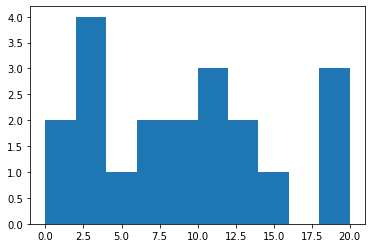

In [3]:
# in Histogram

x = np.arange(0, 22, 2)
y = np.random.randint(0, 20, 20)

plt.hist(y, bins=x)
plt.show()

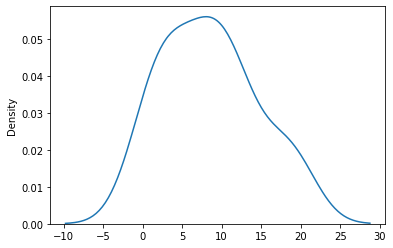

In [4]:
# kdeplot

sns.kdeplot(y)
plt.show()

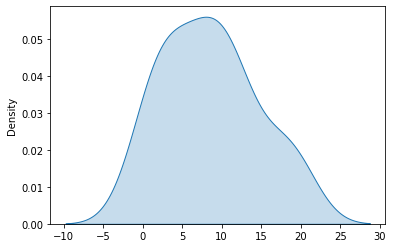

In [5]:
sns.kdeplot(y, shade=True)
plt.show()

### IV-2. 카운트 그림 (Count Plot)

- `sns.coutplot(x=, height=)`
- 범주형 Column의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과

In [6]:
vote_df = pd.DataFrame({'name':['Andy', 'Bob', 'Cat'], 'vote':[True, True, False]})

vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [7]:
# in matplotlib barplot

cnt_vote = vote_df.groupby(['vote']).count()
cnt_vote

,name
vote,
False,1
True,2


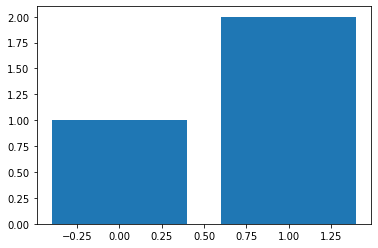

In [8]:
plt.bar(x=[False, True], height=cnt_vote['name'])
# plt.xticks([0, 1])
plt.show()

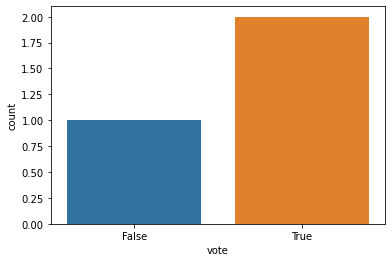

In [9]:
# sns의 countplot

sns.countplot(x=vote_df['vote'])
plt.show()

### IV-3. 캣그림 (Cat Plot)

- `sns.catplot(x=, y=, data)`
- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수
- 복잡한 데이터를 다루는데 용이

- `hue`  : 어떤 변수를 기준으로 다른 색을 칠할 것인지 입력
- `kind` : strip, violin, ... (default=strip)

In [10]:
covid = pd.read_csv("./data/archive/country_wise_latest.csv")

covid.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


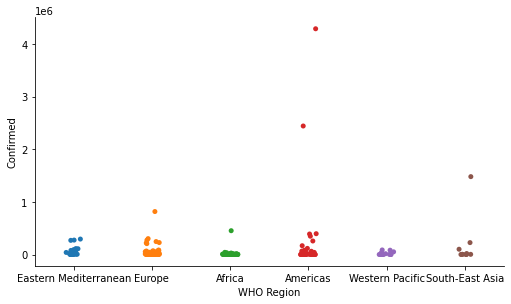

In [11]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid, kind='strip')  # hue라는 인자도 있음
s.fig.set_size_inches(8, 4)  # Plot의 크기 지정
plt.show()

### IV-4. 스트립그림 (Strip Plot)

- `sns.stripplot(x=, y=, data=)`
- scatter plot과 유사하게 데이터의 수치를 표현하는 그래프
- 여러개의 범주를 가진 데이터에 대해 적용 가능

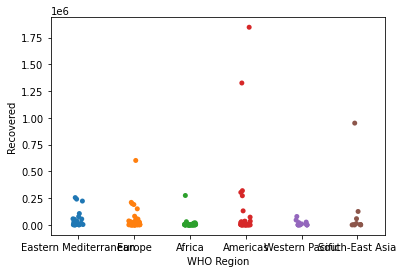

In [12]:
sns.stripplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

### IV-5. Swarm Plot

- `sns.swarmplot(x=, y=, data=)`
- stripplot과 거의 유사
- stripplot의 경우 값들이 비슷할 때 뭉쳐있어서 보기 어려움  
  But, swarmplot을 이용하면 점들이 겹치는 경우 양 옆으로 점을 분산해 한눈에 값에 해당하는 개수를 파악하기 쉬움

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

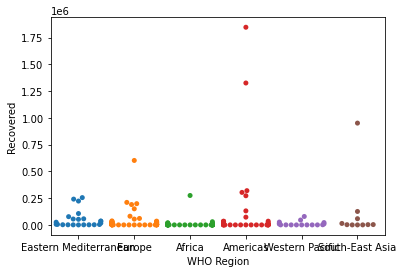

In [13]:
sns.swarmplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

### IV-6. 히트맵 (Heatmap)

- `sns.heatmap(data)`
- 데이터의 행렬을 색상으로 표현해주는 그래프
- 데이터의 상관관계를 알아볼 때 사용

In [14]:
# 히트맵 예제

covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


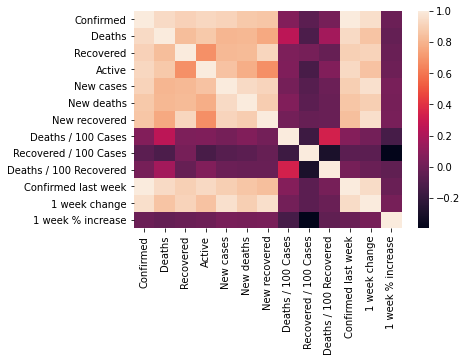

In [15]:
sns.heatmap(covid.corr())
plt.show()